# preprocess

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

In [15]:
import pandas as pd

train_xy = pd.read_csv("F:/Sublime Text 3/Files/Python/XinWangBankCup/train_xy_clean.csv",
                       index_col=["cust_group","cust_id"])
X = train_xy.drop("y",axis=1)
y = train_xy.y

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
sfk = StratifiedKFold(n_splits=3,shuffle=True,random_state=111)

# define metrics

In [20]:
import itertools
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,confusion_matrix,auc

## confusion matrix

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

## learning_curve

In [22]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,\
						n_jobs=-1,train_sizes=np.linspace(0.1,1.0, 5)):
	plt.title(title)
	if ylim is not None:
		plt.ylim(*ylim)
	plt.xlabel('Training Examples')
	plt.ylabel('Score')
	train_sizes,train_scores,test_scores = learning_curve(estimator, X, y,\
									cv=cv,n_jobs=n_jobs,train_sizes=train_sizes) # key step
	train_scores_mean = np.mean(train_scores,axis=1)
	train_scores_std = np.std(train_scores,axis=1)
	test_scores_mean = np.mean(test_scores,axis=1)
	test_scores_std = np.std(test_scores,axis=1)
	plt.grid()
	plt.fill_between(train_sizes,train_scores_mean-train_scores_std,\
					train_scores_mean+train_scores_std,alpha=0.1,color='r')
	plt.fill_between(train_sizes,test_scores_mean-test_scores_std,\
					test_scores_mean+test_scores_std,alpha=0.1,color='g')
	plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training score')
	plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Cross-Validation score')
	plt.legend(loc='best')
	return plt

# model evaluation info

In [36]:
def eval_info(model,test_y,y_pred_prob,
                  cm,classes=y.unique(),normalize=False):
    print("------%s classification_report------\n" % model.__class__.__name__,
          classification_report(test_y,y_pred))
    
    plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    
    print("auc:",roc_auc_score(test_y,y_pred_prob))
#     print("auc(y_pred):",roc_auc_score(test_y,y_pred))
#     fpr, tpr, thresholds = roc_curve(test_y,y_pred_prob,pos_label=1)
#     auc_ = auc(fpr, tpr)
#     print("auc(fpr,tpr):",auc_)

# logistic

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.789051 
 best model: LogisticRegression(C=0.02, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)
------LogisticRegression classification_report------
              precision    recall  f1-score   support

          0       0.98      0.72      0.83      3537
          1       0.11      0.75      0.20       171

avg / total       0.94      0.72      0.80      3708

auc: 0.8107045485733937
train_score: 0.7211581692293858 
 test_score: 0.7179072276159655
logistic model parameters shape: (1, 671) 
 count of non-zero elements: 55


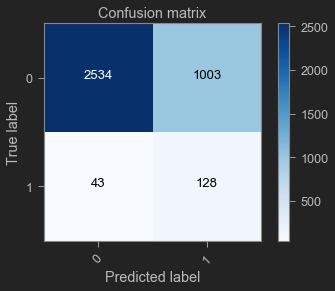

In [43]:
param_grid =  {
            'penalty':['l1'],#,'l2'],
            'C':[0.02],
#             'solver':['newton-cg','lbfgs','sag'],
            'solver':['saga'],
            'max_iter':[350],
            'class_weight':['balanced'],
            'random_state':[666],      
}

LR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
LR.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (LR.best_score_, LR.best_estimator_))

LR_best = LR.best_estimator_
y_pred =LR_best.predict(test_x)
y_pred_prob = LR_best.predict_proba(test_x)[:,1]
train_score = LR_best.score(train_x,train_y)
test_score = LR_best.score(test_x,test_y)
cm = confusion_matrix(test_y,y_pred)

eval_info(LR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

print("logistic model parameters shape:",LR_best.coef_.shape,"\n",
     "count of non-zero elements:",np.count_nonzero(LR_best.coef_))

In [88]:
# save model
import pickle
with open("./best_models/LR_pkl.txt",'wb') as f:
    pickle.dump(LR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
LR_cv_auc = cross_val_score(LR_best,X,y,cv=5,scoring="roc_auc")
print("best_LR_cv_auc",LR_cv_auc)

best_LR_cv_auc [0.80566242 0.81869996 0.79967903 0.78328986 0.79652184]


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

best score: 0.748537 
 best model: DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=233,
            splitter='best')
------DecisionTreeClassifier classification_report------
              precision    recall  f1-score   support

          0       0.99      0.64      0.77      3537
          1       0.10      0.82      0.18       171

avg / total       0.95      0.65      0.75      3708

auc: 0.7793054873542352
train_score: 0.6359140365075083 
 test_score: 0.6464401294498382


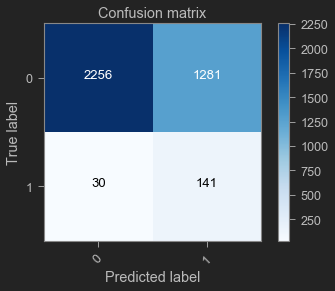

In [54]:
param_grid = {"criterion":['gini'],
               "max_depth":[3],
                'max_features':[0.8],
#               "min_impurity_decrease":[0],
#              "min_samples_split":[2],
#               "min_samples_leaf":[4], # 样本量不大不需管
#               "max_leaf_nodes":[19],
              "class_weight":["balanced"],
              'random_state':[233],
             }
DT = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=sfk,scoring='roc_auc')
DT.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (DT.best_score_, DT.best_estimator_))

DT_best = DT.best_estimator_
train_score = DT_best.score(train_x,train_y)
test_score = DT_best.score(test_x,test_y)
y_pred = DT_best.predict(test_x)
y_pred_prob = DT_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(DT_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [89]:
# save model
import pickle
with open("./best_models/DT_pkl.txt",'wb') as f:
    pickle.dump(DT_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
DT_cv_auc = cross_val_score(DT_best,X,y,cv=5,scoring="roc_auc")
print("best_LR_cv_auc:",DT_cv_auc)

best_LR_cv_auc: [0.75759147 0.77992275 0.72547365 0.73681732 0.76347519]


# SVM

In [81]:
svm_train_xy = pd.read_csv("F:./resample data/under_resample1.csv",index_col=['cust_id'])
svm_y = svm_train_xy.y
svm_X = svm_train_xy.drop('y',axis=1)
svm_train_x,svm_test_x,svm_train_y,svm_test_y = train_test_split(svm_X,svm_y,stratify=svm_y)
sfk = StratifiedKFold(n_splits=3)

best score: 0.768595 
 best model: SVC(C=0.5, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=True, random_state=520, shrinking=True,
  tol=0.001, verbose=False)
------SVC classification_report------
              precision    recall  f1-score   support

          0       0.91      0.76      0.83       684
          1       0.42      0.70      0.52       171

avg / total       0.81      0.75      0.77       855

auc: 0.8004514209500359
train_score: 0.869785575048733 
 test_score: 0.7450292397660818


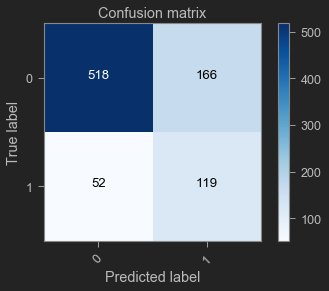

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
            'C':[0.5],
            'kernel':['rbf'],
            'class_weight':["balanced"],
            'gamma':[0.03],
#             'shrinking':[True],
            'probability':[True],
            'random_state':[520],
             }

SVC = GridSearchCV(SVC(),param_grid,cv=sfk,scoring='roc_auc')
SVC.fit(svm_train_x,svm_train_y)
print("best score: %f \n best model: %s" % (SVC.best_score_, SVC.best_estimator_))
SVC_best = SVC.best_estimator_
train_score = SVC_best.score(svm_train_x,svm_train_y)
test_score = SVC_best.score(svm_test_x,svm_test_y)
y_pred = SVC_best.predict(svm_test_x)
y_pred_prob = SVC_best.predict_proba(svm_test_x)[:,1]
cm = confusion_matrix(svm_test_y,y_pred)

eval_info(SVC_best,svm_test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [90]:
# save model
import pickle
with open("./best_models/SVM_pkl.txt",'wb') as f:
    pickle.dump(SVC_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
SVC_cv_auc = cross_val_score(SVC_best,X,y,cv=5,scoring="roc_auc")
print("best_SVC_cv_auc",SVC_cv_auc)

best_SVC_cv_auc [0.77630537 0.77360136 0.75509904 0.75360771 0.75548677]


# bagging

F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.8031122949206964
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]
elaspe: 2215.527766727019 
 train_score: 0.9538710547612624 
 test_score: 0.9538834951456311


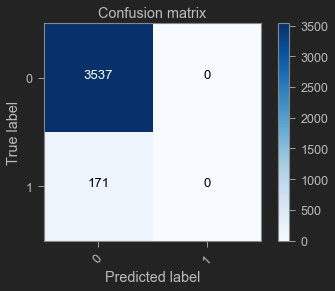

In [35]:
from sklearn.ensemble import BaggingClassifier
bagging_svm = BaggingClassifier(SVM_model,max_samples=0.6)

start = time.clock()
bagging_svm.fit(train_x,train_y)

train_score = bagging_svm.score(train_x,train_y)
test_score = bagging_svm.score(test_x,test_y)
y_pred = bagging_svm.predict(test_x)
y_score = bagging_svm.decision_function(test_x)
cm = confusion_matrix(test_y,y_pred)
eval_info(test_y,y_pred,y_score,cm)
print("elaspe:",time.clock()-start,"\n",
      "train_score:",train_score,"\n",
      "test_score:",test_score)

# adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator':[DT_best],
    'n_estimators':[40],
    'learning_rate':[0.03],
    'random_state':[999],
}

ADAB = GridSearchCV(AdaBoostClassifier(),param_grid,cv=sfk,scoring="roc_auc")
ADAB.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (ADAB.best_score_,ADAB.best_estimator_))

ADAB_best = ADAB.best_estimator_
train_score = ADAB_best.score(train_x,train_y)
test_score = ADAB_best.score(test_x,test_y)
y_pred = ADAB_best.predict(test_x)
y_pred_prob = ADAB_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(ADAB_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# voting 

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('lr', LR_model), ('rf', RF_model), ('svm', SVM_model),("dt",DT_model)],voting='soft')
for clf, label in zip([LR_model, SVM_model, DT_model, RF_model], ['Logistic Regression','SVM','Decission Tree','Random Forest']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.74 (+/- 0.19) [Logistic Regression]
Accuracy: 0.83 (+/- 0.16) [SVM]
Accuracy: 0.95 (+/- 0.00) [Decission Tree]
Accuracy: 0.95 (+/- 0.00) [Random Forest]


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692009450636298
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]
elaspe: 6957.663312064517 
 train_score: 0.955579534214549 
 test_score: 0.9538834951456311


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


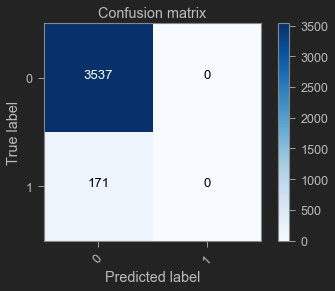

In [38]:
voting.fit(train_x,train_y)
train_score = voting.score(train_x,train_y)
test_score = voting.score(test_x,test_y)
y_pred = voting.predict(test_x)
cm = confusion_matrix(test_y,y_pred)
eval_info(test_y,y_pred,y_score,cm)
print("elaspe:",time.clock()-start,"\n",
      "train_score:",train_score,"\n",
      "test_score:",test_score)

# PCA

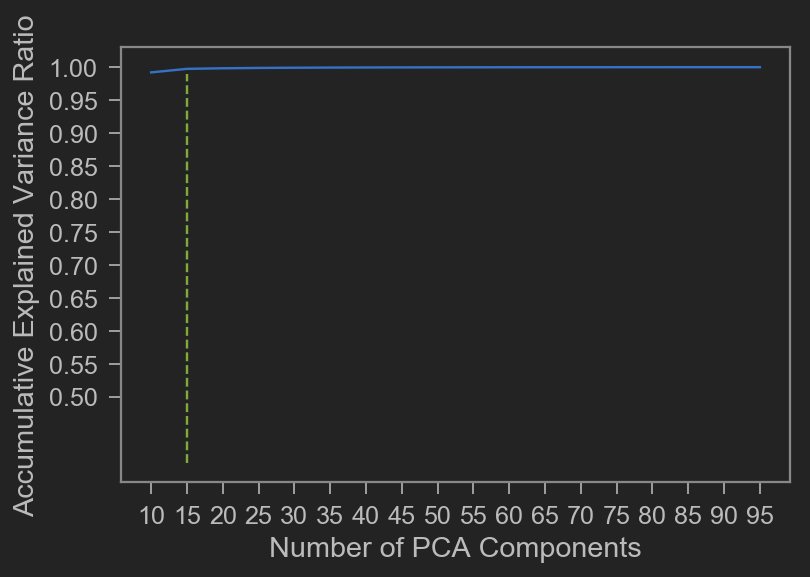

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
n_components = range(10,100,5)
acc_explained_ratio = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit_transform(X)
    acc_explained_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(6,4),dpi=144)
plt.plot(n_components,acc_explained_ratio)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accumulative Explained Variance Ratio")
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(np.arange(0,100,5))
plt.plot((15,15),(0.4,0.99),"g--")
plt.show()

In [39]:
n_components = 15
pca_model = PCA(n_components=n_components).fit(train_x)
pca_train_x = pca_model.transform(train_x)
pca_test_x = pca_model.transform(test_x)
param_grid = {"C":[1,5,10,50],"gamma":[0.0001,0.0005,0.001,0.005,0.01],
              "kernel":["rbf"],"class_weight":["balanced"]}
SVC_PCA_model = GridSearchCV(SVC(),param_grid,verbose=2,n_jobs=4)
SVC_PCA_model.fit(pca_train_x,train_y)
print("-----SVM Classifier(PCA)------\n",
      "best param:{0}\nbest score:{1}".format(SVC_PCA_model.best_params_,SVC_PCA_model.best_score_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.5min finished


-----SVM Classifier(PCA)------
 best param:{'C': 50, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
best score:0.79575


In [41]:
y_pred = SVC_PCA_model.best_estimator_.predict(pca_test_x)
print("------Confusion Matrix------\n",confusion_matrix(test_y,y_pred))
print("-----Classification_report-----\n",classification_report(test_y,y_pred))

------Confusion Matrix------
 [[2281  585]
 [  78   56]]
-----Classification_report-----
              precision    recall  f1-score   support

          0       0.97      0.80      0.87      2866
          1       0.09      0.42      0.14       134

avg / total       0.93      0.78      0.84      3000



# K-Means

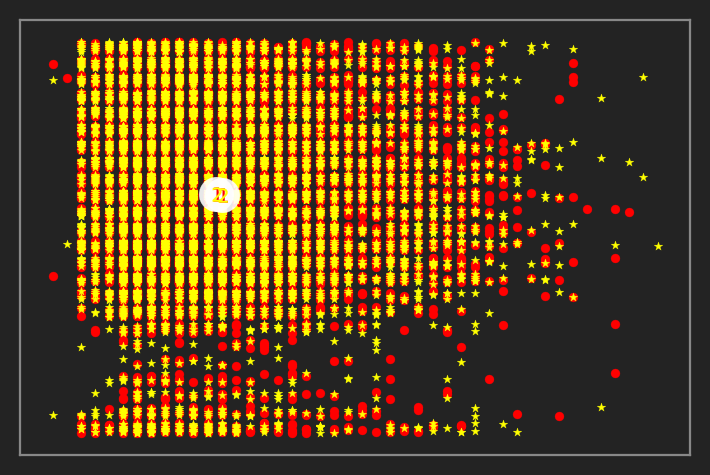

In [39]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(X)
kmean_score = kmean.score(X)

labels = kmean.labels_
centers = kmean.cluster_centers_
plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[labels==0].iloc[:,0],X[labels==0].iloc[:,1],marker="o",s=20,c="red")
plt.scatter(X[labels==1].iloc[:,0],X[labels==1].iloc[:,1],marker="*",s=20,c="yellow")
plt.scatter(centers[:,0],centers[:,1],marker="o",c="white",alpha=0.9,s=300)
plt.scatter(centers[:,0],centers[:,1],marker="$1$",c="red",s=50)
plt.scatter(centers[:,0],centers[:,1],marker="$2$",c="yellow",s=50)

In [40]:
from sklearn.metrics import adjusted_rand_score,homogeneity_score,completeness_score,v_measure_score
AR_score = adjusted_rand_score(y,labels)
H_score = homogeneity_score(y,labels)
C_score = completeness_score(y,labels)
V_score = v_measure_score(y,labels)
print("Adjusted Rand-Index:",AR_score,"\n",
     "Homogeneity Score:",H_score,"\n",
     "Completeness Score:",C_score,"\n",
     "V-measure Score:",V_score)

Adjusted Rand-Index: 0.0027599712496652125 
 Homogeneity Score: 0.01662842545061333 
 Completeness Score: 0.004487396252852615 
 V-measure Score: 0.0070675283307278045


# predict

In [41]:
test_all = pd.read_csv("./test_all_clean.csv",index_col=["cust_group","cust_id"]).fillna(-1)

In [204]:
test_all_y_pred = SVM_model.predict(test_all)

test_all_y_pred_prob = SVM_model.predict_proba(test_all)

In [174]:
test_all_y_pred = RF_model.predict(test_all)

test_all_y_pred_prob = RF_model.predict_proba(test_all)

In [44]:
# test_all_y_pred = bagging_svm.predict(test_all)

test_all_y_pred_prob = bagging_svm.predict_proba(test_all)

In [45]:
len(test_all_y_pred_prob[:,1][test_all_y_pred_prob[:,1]>0.5])

0

In [ ]:
pd.value_counts(test_all_y_pred)

# KNN

------KNeighborsClassifier------
elaspe: 305.2950389313734 
 train_score: 0.9540508947037137 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------KNeighborsClassifier------
elaspe: 305.5213248479308 
 train_score: 1.0 
 test_score: 0.953344120819849
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.25      0.01      0.01       171

avg / total       0.92      0.95      0.93      3708

auc: 0.5024998883978394
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3534    3]
 [ 170    1]]
------RadiusNeighborsClassifier------
elaspe: 436.63880084495827 
 train_score: 0.9538710547612624 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


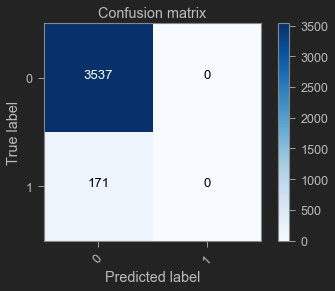

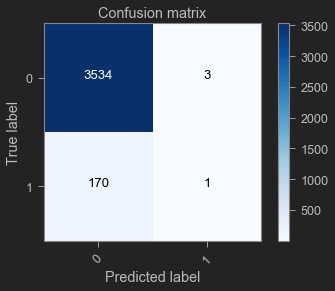

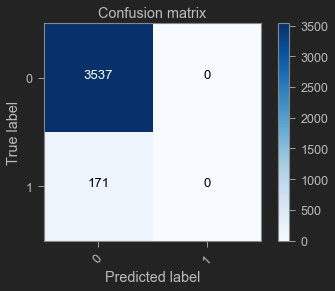

In [29]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors=10)
knn_model2 = KNeighborsClassifier(n_neighbors=10,weights="distance")
knn_model3 = RadiusNeighborsClassifier(n_neighbors=10,radius=1000.0)

models = [knn_model1,knn_model2,knn_model3]
for knn in models:
    start = time.clock()
    knn.fit(train_x,train_y)
    train_score = knn.score(train_x,train_y)
    test_score = knn.score(test_x,test_y)
    y_pred = knn.predict(test_x)
    print("------"+knn.__class__.__name__+"------\n"
          "elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
    cm = confusion_matrix(test_y,y_pred)
    eval_info(test_y,y_pred,y_score,cm)

# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import time

GNB = GaussianNB()
BNB = BernoulliNB()
# models = [GNB,BNB]
# for NB in models:
start = time.clock()
GNB.fit(train_x,train_y)
train_score = GNB.score(train_x,train_y)
test_score = GNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob1 = GNB.predict_proba(test_x)[:,1]

start = time.clock()
BNB.fit(train_x,train_y)
train_score = BNB.score(train_x,train_y)
test_score = BNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob2 = BNB.predict_proba(test_x)[:,1]

y_pred_prob = y_pred_prob1 + y_pred_prob2
y_pred = np.where(y_pred_prob>0.5,1,0)

cm = confusion_matrix(test_y,y_pred)
eval_info(NB,test_y,y_pred_prob,cm)